<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
data = pd.read_csv('/content/sample_data/Wholesale customers data.csv')
data.shape

(440, 8)

In [ ]:
data.isnull().sum()


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
df = data.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
scaled_data[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

In [ ]:
linked = linkage(scaled_data, method='ward')


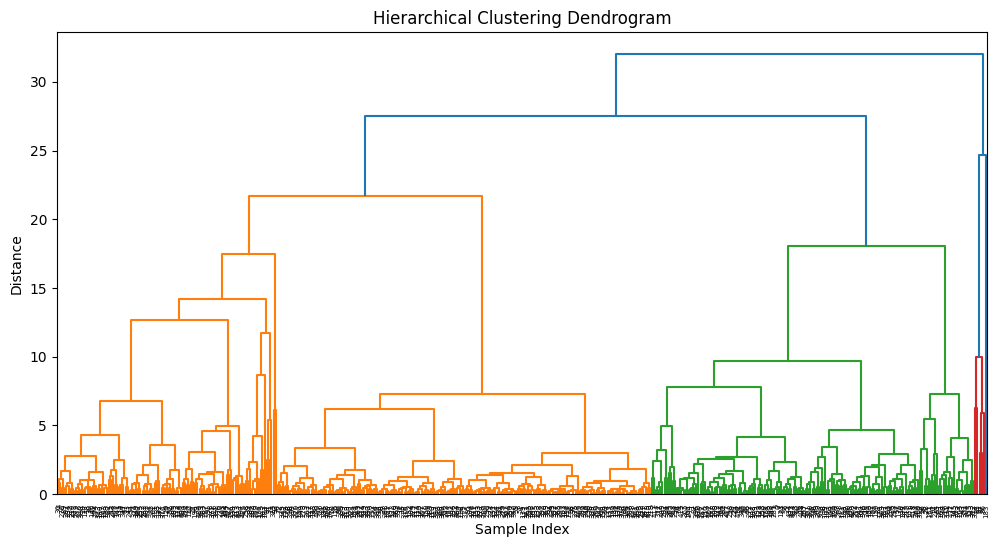

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Create flat clusters (e.g., cut tree at 3 clusters)
clusters = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = clusters


In [ ]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
1        27477.000000  43542.166667  54588.500000  8285.666667   
2         5794.241830   9419.888889  13761.738562  1461.764706   
3        15048.932384   3017.298932   3791.761566  3837.316726   

         Detergents_Paper    Delicassen  
Cluster                                  
1            25018.333333  10247.833333  
2             5913.379085   1577.607843  
3              758.007117   1309.900356  


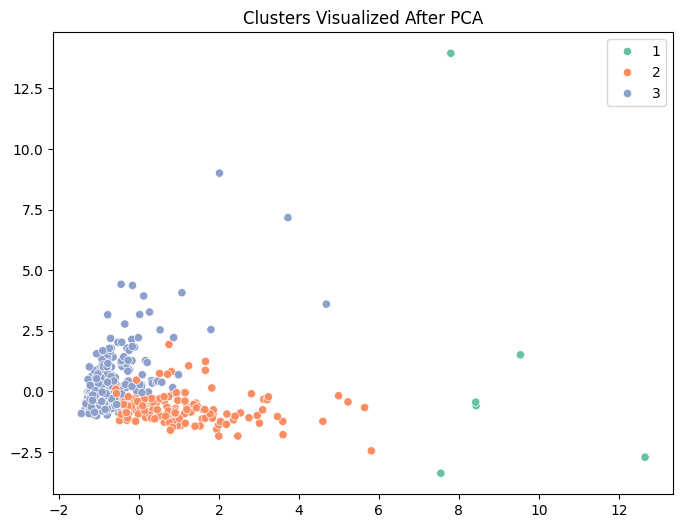

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Clusters Visualized After PCA")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.2646091480214908
